# Energy Analyst Programming Exercise - Analytical Tasks
Name: Yuki Kitayama <br>
Email: yk2797@columbia.edu <br>
Date: 4/25/2020

### Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Hyperparameter
please adjust path to read csv in your environment

In [362]:
PATH_CSV_01 = 'historicalPriceData_ERCOT_DA_Prices_2016.csv'
PATH_CSV_02 = 'historicalPriceData_ERCOT_DA_Prices_2017.csv'
PATH_CSV_03 = 'historicalPriceData_ERCOT_DA_Prices_2018.csv'
PATH_CSV_04 = 'historicalPriceData_ERCOT_DA_Prices_2019.csv'
PATH_CSV_05 = 'AveragePriceByMonth.csv'
PATH_CSV_06 = 'HourlyVolatilityByYear.csv'
PATH_CSV_07 = 'MaxVolatilityByYear.csv'
SUBDIR = 'formattedSpotHistory/'
SUBDIR_02 = 'hourlyShapeProfiles/'
SAVEFIG_01 = 'SettlementHubAveragePriceByMonth.png'
SAVEFIG_02 = 'LoadZoneAveragePriceByMonth.png'
SAVEFIG_03 = 'HubPriceVolatilityByYear.png'

### Read data

In [7]:
df_tmp_01 = pd.read_csv(PATH_CSV_01)
df_tmp_02 = pd.read_csv(PATH_CSV_02)
df_tmp_03 = pd.read_csv(PATH_CSV_03)
df_tmp_04 = pd.read_csv(PATH_CSV_04)

In [123]:
df_tmp_01.head()

,Date,SettlementPoint,Price,settlement_type
0,2016-01-01 00:00:00,HB_BUSAVG,18.42,HB
1,2016-01-01 00:00:00,HB_HOUSTON,18.42,HB
2,2016-01-01 00:00:00,HB_HUBAVG,18.42,HB
3,2016-01-01 00:00:00,HB_NORTH,18.43,HB
4,2016-01-01 00:00:00,HB_SOUTH,18.38,HB


In [124]:
df_tmp_01.tail()

,Date,SettlementPoint,Price,settlement_type
122957,2016-12-31 23:00:00,LZ_LCRA,24.97,LZ
122958,2016-12-31 23:00:00,LZ_NORTH,24.97,LZ
122959,2016-12-31 23:00:00,LZ_RAYBN,24.97,LZ
122960,2016-12-31 23:00:00,LZ_SOUTH,24.97,LZ
122961,2016-12-31 23:00:00,LZ_WEST,24.97,LZ


### Check data

In [12]:
print(df_tmp_01.shape)
print(df_tmp_02.shape)
print(df_tmp_03.shape)
print(df_tmp_04.shape)
print(df_tmp_01.columns)
print(df_tmp_02.columns)
print(df_tmp_03.columns)
print(df_tmp_04.columns)
print("2016")
print(df_tmp_01.isna().sum())
print("2017")
print(df_tmp_01.isna().sum())
print("2018")
print(df_tmp_01.isna().sum())
print("2019")
print(df_tmp_01.isna().sum())

(122962, 3)
(122626, 3)
(122626, 3)
(129106, 3)
Index(['Date', 'SettlementPoint', 'Price'], dtype='object')
Index(['Date', 'SettlementPoint', 'Price'], dtype='object')
Index(['Date', 'SettlementPoint', 'Price'], dtype='object')
Index(['Date', 'SettlementPoint', 'Price'], dtype='object')
2016
Date               0
SettlementPoint    0
Price              0
dtype: int64
2017
Date               0
SettlementPoint    0
Price              0
dtype: int64
2018
Date               0
SettlementPoint    0
Price              0
dtype: int64
2019
Date               0
SettlementPoint    0
Price              0
dtype: int64


## Task 1
Combine them.

In [31]:
df_price = df_tmp_01.append([df_tmp_02, df_tmp_03, df_tmp_04])

In [16]:
df_price.shape

(497320, 3)

In [17]:
df_price.head()

,Date,SettlementPoint,Price
0,2016-01-01 00:00:00,HB_BUSAVG,18.42
1,2016-01-01 00:00:00,HB_HOUSTON,18.42
2,2016-01-01 00:00:00,HB_HUBAVG,18.42
3,2016-01-01 00:00:00,HB_NORTH,18.43
4,2016-01-01 00:00:00,HB_SOUTH,18.38


In [18]:
df_price.tail()

,Date,SettlementPoint,Price
129101,2019-12-31 23:00:00,LZ_LCRA,14.53
129102,2019-12-31 23:00:00,LZ_NORTH,14.48
129103,2019-12-31 23:00:00,LZ_RAYBN,14.48
129104,2019-12-31 23:00:00,LZ_SOUTH,14.70
129105,2019-12-31 23:00:00,LZ_WEST,16.78


In [40]:
df_price['SettlementPoint'].unique()

array(['HB_BUSAVG', 'HB_HOUSTON', 'HB_HUBAVG', 'HB_NORTH', 'HB_SOUTH',
       'HB_WEST', 'LZ_AEN', 'LZ_CPS', 'LZ_HOUSTON', 'LZ_LCRA', 'LZ_NORTH',
       'LZ_RAYBN', 'LZ_SOUTH', 'LZ_WEST', 'HB_PAN'], dtype=object)

In [41]:
len(df_price['SettlementPoint'].unique())

15

## Task 2

In [35]:
# set index
df_price['index'] = pd.to_datetime(df_price['Date'])
df_price = df_price.set_index('index')

# make variables
df_price['year'] = df_price.index.year
df_price['month'] = df_price.index.month

In [49]:
average_price = df_price.groupby(['year', 'month', 'SettlementPoint']).mean()

In [42]:
average_price.shape

(681, 1)

In [43]:
12 * 4 * 15

720

In [38]:
average_price.head()

Price
year month SettlementPoint           
2016 1     HB_BUSAVG        19.209301
           HB_HOUSTON       19.565726
           HB_HUBAVG        19.258696
           HB_NORTH         19.133306
           HB_SOUTH         19.210054

In [39]:
average_price.tail()

Price
year month SettlementPoint           
2019 12    LZ_LCRA          19.456882
           LZ_NORTH         19.006801
           LZ_RAYBN         19.085067
           LZ_SOUTH         19.786882
           LZ_WEST          39.502594

## Task 3 

In [50]:
# organize appropriate columns
average_price = average_price.reset_index()
average_price = average_price.rename(columns = {'year': 'Year',
                                                'month': 'Month',
                                                'Price': 'AveragePrice'})
average_price = average_price[['SettlementPoint', 'Year', 'Month', 'AveragePrice']]

In [51]:
average_price.head()

,SettlementPoint,Year,Month,AveragePrice
0,HB_BUSAVG,2016,1,19.209301
1,HB_HOUSTON,2016,1,19.565726
2,HB_HUBAVG,2016,1,19.258696
3,HB_NORTH,2016,1,19.133306
4,HB_SOUTH,2016,1,19.210054


In [52]:
average_price.tail()

,SettlementPoint,Year,Month,AveragePrice
676,LZ_LCRA,2019,12,19.456882
677,LZ_NORTH,2019,12,19.006801
678,LZ_RAYBN,2019,12,19.085067
679,LZ_SOUTH,2019,12,19.786882
680,LZ_WEST,2019,12,39.502594


In [56]:
average_price.to_csv(PATH_CSV_05, index = False)

## Task 4

In [146]:
year = 2016

tmp = df_tmp_01.copy()

tmp['settlement_type'] = [p[0:2] for p in tmp['SettlementPoint']]

# filter out zero or negative
print('before remove zero and negative', tmp.shape)
tmp = tmp.loc[tmp['Price'] > 0]
print('after', tmp.shape)

# do not compute load zones
print('before remove load zone', tmp.shape)
tmp = tmp.loc[tmp['settlement_type'] == 'HB']
print('after', tmp.shape)

print(tmp['SettlementPoint'].unique())

# set index
tmp['index'] = pd.to_datetime(tmp['Date'])
tmp = tmp.set_index(['index', 'SettlementPoint'])

# remove columns
tmp = tmp.drop(['Date', 'settlement_type'], axis = 1)

# unstack
tmp = tmp.unstack(level = 1)

# rename columns
tmp.columns = tmp.columns.get_level_values(1)

# calculate log return
hubs = tmp.columns
for h in hubs:
    new_name = 'logreturn_' + h
    tmp[new_name] = np.log(tmp[h]).diff()
    
# drop na
tmp = tmp.dropna()

# remove original price columns
tmp = tmp.drop(hubs.tolist(), axis = 1)

# calculate sd
tmp = tmp.std().to_frame()
tmp = tmp.rename(columns = {0: 'HourlyVolatility'})

# organize columns
tmp['Year'] = year
tmp = tmp.reset_index()
tmp['SettlementPoint'] = [s[10:] for s in tmp['SettlementPoint']]

tmp.head()

before remove zero and negative (122962, 4)
after (122944, 4)
before remove load zone (122944, 4)
after (52685, 4)
['HB_BUSAVG' 'HB_HOUSTON' 'HB_HUBAVG' 'HB_NORTH' 'HB_SOUTH' 'HB_WEST']


,SettlementPoint,HourlyVolatility,Year
0,HB_BUSAVG,0.185377,2016
1,HB_HOUSTON,0.190962,2016
2,HB_HUBAVG,0.187334,2016
3,HB_NORTH,0.184080,2016
4,HB_SOUTH,0.208387,2016


In [147]:
s = "logreturn_"
len(s)

10

In [148]:
def calc_volatility(df, year):
    tmp = df.copy()

    tmp['settlement_type'] = [p[0:2] for p in tmp['SettlementPoint']]

    # filter out zero or negative
    # print('before remove zero and negative', tmp.shape)
    tmp = tmp.loc[tmp['Price'] > 0]
    # print('after', tmp.shape)

    # do not compute load zones
    # print('before remove load zone', tmp.shape)
    tmp = tmp.loc[tmp['settlement_type'] == 'HB']
    # print('after', tmp.shape)

    # print(tmp['SettlementPoint'].unique())

    # set index
    tmp['index'] = pd.to_datetime(tmp['Date'])
    tmp = tmp.set_index(['index', 'SettlementPoint'])

    # remove columns
    tmp = tmp.drop(['Date', 'settlement_type'], axis = 1)

    # unstack
    tmp = tmp.unstack(level = 1)

    # rename columns
    tmp.columns = tmp.columns.get_level_values(1)

    # calculate log return
    hubs = tmp.columns
    for h in hubs:
        new_name = 'logreturn_' + h
        tmp[new_name] = np.log(tmp[h]).diff()

    # drop na
    tmp = tmp.dropna()

    # remove original price columns
    tmp = tmp.drop(hubs.tolist(), axis = 1)

    # calculate sd
    tmp = tmp.std().to_frame()
    tmp = tmp.rename(columns = {0: 'HourlyVolatility'})

    # organize columns
    tmp['Year'] = year
    tmp = tmp.reset_index()
    tmp['SettlementPoint'] = [s[10:] for s in tmp['SettlementPoint']]
    
    return tmp

In [172]:
df_vol_01 = calc_volatility(df_tmp_01, 2016)
df_vol_02 = calc_volatility(df_tmp_02, 2017)
df_vol_03 = calc_volatility(df_tmp_03, 2018)
df_vol_04 = calc_volatility(df_tmp_04, 2019)

df_vol = df_vol_01.append([df_vol_02, df_vol_03, df_vol_04])
df_vol = df_vol.reset_index(drop = True)

## Task 5

In [150]:
df_vol.to_csv(PATH_CSV_06, index = False)

## Task 6

In [179]:
year = 2016

tmp = df_vol.copy()

idx_max = tmp.loc[tmp['Year'] == year, 'HourlyVolatility'].idxmax()

print(idx_max)

tmp.iloc[idx_max].to_frame().transpose()

4


,SettlementPoint,HourlyVolatility,Year
4,HB_SOUTH,0.208387,2016


In [194]:
years = df_vol['Year'].unique().tolist()

list_tmp = []

for year in years:
    tmp = df_vol.copy()
    idx_max = tmp.loc[tmp['Year'] == year, 'HourlyVolatility'].idxmax()
    list_tmp.append(tmp.iloc[idx_max])
    
df_max_vol = pd.DataFrame(list_tmp)
df_max_vol = df_max_vol[['SettlementPoint', 'Year', 'HourlyVolatility']]

In [195]:
df_max_vol

,SettlementPoint,Year,HourlyVolatility
4,HB_SOUTH,2016,0.208387
11,HB_WEST,2017,0.239376
17,HB_WEST,2018,0.287354
22,HB_PAN,2019,0.547431


In [197]:
df_max_vol.to_csv(PATH_CSV_07, index = False)

## Task 7

In [233]:
i = 0

tmp = df_price.copy()
tmp['he'] = tmp.index.hour + 1
tmp['day'] = tmp.index.day

# tmp['date_csv'] = tmp['month'].astype(str) + '/' + tmp['day'].astype(str) + '/' + tmp['year'].astype(str)
tmp['date_csv'] = [d[0:10] for d in tmp['Date']]

points = tmp['SettlementPoint'].unique().tolist()

tmp = tmp.loc[tmp['SettlementPoint'] == points[i]]

tmp
# remove unnecessary columns
tmp = tmp.drop(['Date', 'datetime', 'year', 'day', 'month'], axis = 1)

# set index
tmp = tmp.reset_index(drop = True)
tmp = tmp.set_index(['SettlementPoint', 'date_csv', 'he'])

# unstack
tmp = tmp.unstack(level = 2)

# change column names
hes = tmp.columns.get_level_values(1)

new_names = []
for he in hes:
    new_names.append('X' + str(he))
    
tmp.columns = new_names

# organize it to required csv format
tmp = tmp.reset_index()
tmp = tmp.rename(columns = {'SettlementPoint': 'Variable',
                            'date_csv': 'Date'})
tmp['Date'] = [str(int(d[5:7])) + '/' + str(int(d[8:10])) + '/' + str(d[0:4]) for d in tmp['Date']]

tmp.head()

,Variable,Date,X1,X2,X3,X4,X5,X6,X7,X8,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24
0,HB_BUSAVG,1/1/2016,18.42,16.15,15.61,15.62,15.94,16.69,18.96,19.18,...,19.09,19.34,20.07,24.96,26.26,23.24,22.79,21.36,20.31,19.65
1,HB_BUSAVG,1/2/2016,18.99,17.94,17.16,17.00,17.90,17.65,20.11,21.33,...,18.29,17.94,19.34,23.48,23.48,21.73,20.73,19.97,19.87,18.43
2,HB_BUSAVG,1/3/2016,17.44,16.46,16.18,16.35,17.01,17.70,19.28,20.03,...,16.04,15.97,16.98,21.26,21.87,20.88,20.25,19.69,18.78,18.14
3,HB_BUSAVG,1/4/2016,17.01,17.07,17.47,18.00,19.34,21.79,53.72,35.84,...,16.44,16.52,17.43,23.00,27.38,22.92,22.65,21.53,20.39,18.72
4,HB_BUSAVG,1/5/2016,15.89,15.88,15.99,16.50,18.00,21.19,48.84,29.84,...,18.01,17.63,18.48,22.64,22.71,21.93,21.00,19.64,18.61,17.11


In [242]:
def make_model_input(df, variable):
    tmp = df.copy()
    tmp['he'] = tmp.index.hour + 1
    tmp['day'] = tmp.index.day

    # tmp['date_csv'] = tmp['month'].astype(str) + '/' + tmp['day'].astype(str) + '/' + tmp['year'].astype(str)
    tmp['date_csv'] = [d[0:10] for d in tmp['Date']]

    # points = tmp['SettlementPoint'].unique().tolist()

    # tmp = tmp.loc[tmp['SettlementPoint'] == points[i]]
    tmp = tmp.loc[tmp['SettlementPoint'] == variable]

    tmp
    # remove unnecessary columns
    tmp = tmp.drop(['Date', 'datetime', 'year', 'day', 'month'], axis = 1)

    # set index
    tmp = tmp.reset_index(drop = True)
    tmp = tmp.set_index(['SettlementPoint', 'date_csv', 'he'])

    # unstack
    tmp = tmp.unstack(level = 2)

    # change column names
    hes = tmp.columns.get_level_values(1)

    new_names = []
    for he in hes:
        new_names.append('X' + str(he))

    tmp.columns = new_names

    # organize it to required csv format
    tmp = tmp.reset_index()
    tmp = tmp.rename(columns = {'SettlementPoint': 'Variable',
                                'date_csv': 'Date'})
    tmp['Date'] = [str(int(d[5:7])) + '/' + str(int(d[8:10])) + '/' + str(d[0:4]) for d in tmp['Date']]

    return tmp

In [241]:
variable = 'HB_BUSAVG'
test = make_model_input(df_price, variable)
CSV_NAME = 'spot_' + variable + '.csv'

test.to_csv(CSV_NAME, index = False)

test.to_csv(SUBDIR + CSV_NAME, index = False)

In [244]:
variables = df_price['SettlementPoint'].unique().tolist()

for variable in variables:
    df_model = make_model_input(df_price, variable)
    CSV_NAME = 'spot_' + variable + '.csv'
    df_model.to_csv(SUBDIR + CSV_NAME, index = False)

## Bonus - Mean Plots

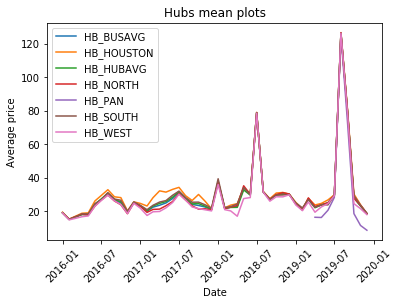

In [272]:
TYPE = 'HB'
tmp = average_price.copy()

# make columns
tmp['type'] = [sp[0:2] for sp in tmp['SettlementPoint']]
tmp['day'] = 1
tmp['index'] = tmp['Year'].astype(str) + '-' + tmp['Month'].astype(str) + '-' + tmp['day'].astype(str)
tmp['index'] = pd.to_datetime(tmp['index'])

# only hub
tmp = tmp.loc[tmp['type'] == TYPE]

# remove unnecessary columns
tmp = tmp.drop(['Year', 'Month', 'day', 'type'], axis = 1)

# index
tmp = tmp.set_index(['index', 'SettlementPoint'])
tmp = tmp.unstack(level = 1)

# column name
tmp.columns = tmp.columns.get_level_values(1)

hubs = tmp.columns

for hub in hubs:

    plt.plot(tmp[hub], label = hub)
    
plt.xticks(rotation = 45)
plt.xlabel('Date')
plt.ylabel('Average price')
plt.title('Hubs mean plots')
plt.legend()
plt.show()

In [273]:
def make_plot_df(df, TYPE):
    
    tmp = df.copy()

    # make columns
    tmp['type'] = [sp[0:2] for sp in tmp['SettlementPoint']]
    tmp['day'] = 1
    tmp['index'] = tmp['Year'].astype(str) + '-' + tmp['Month'].astype(str) + '-' + tmp['day'].astype(str)
    tmp['index'] = pd.to_datetime(tmp['index'])

    # only hub
    tmp = tmp.loc[tmp['type'] == TYPE]

    # remove unnecessary columns
    tmp = tmp.drop(['Year', 'Month', 'day', 'type'], axis = 1)

    # index
    tmp = tmp.set_index(['index', 'SettlementPoint'])
    tmp = tmp.unstack(level = 1)

    # column name
    tmp.columns = tmp.columns.get_level_values(1)

    return tmp

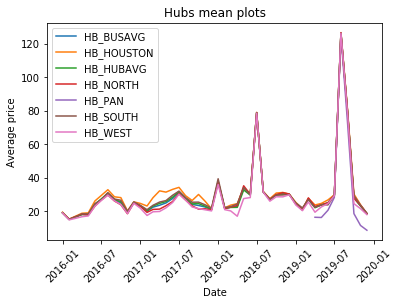

In [292]:
df_hub_plot = make_plot_df(average_price, 'HB')
cols = df_hub_plot.columns

for col in cols:

    plt.plot(df_hub_plot[col], label = col)
    
plt.xticks(rotation = 45)
plt.xlabel('Date')
plt.ylabel('Average price')
plt.title('Hubs mean plots')
plt.legend()
plt.savefig(SAVEFIG_01)
plt.show()

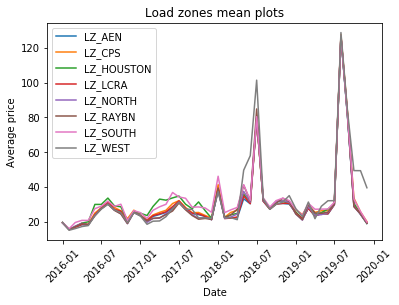

In [293]:
df_lz_plot = make_plot_df(average_price, 'LZ')
cols = df_lz_plot.columns

for col in cols:

    plt.plot(df_lz_plot[col], label = col)
    
plt.xticks(rotation = 45)
plt.xlabel('Date')
plt.ylabel('Average price')
plt.title('Load zones mean plots')
plt.legend()
plt.savefig(SAVEFIG_02)
plt.show()

## Bonus - Volatility Plots

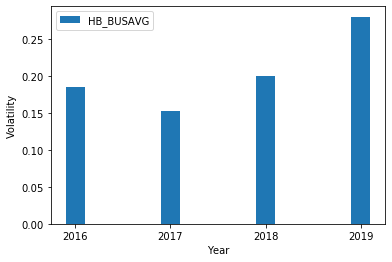

In [312]:
TYPE = 'HB'
tmp = df_vol.copy()

# make columns
tmp['type'] = [sp[0:2] for sp in tmp['SettlementPoint']]
tmp['Month'] = 1
tmp['day'] = 1
tmp['index'] = tmp['Year'].astype(str) + '-' + tmp['Month'].astype(str) + '-' + tmp['day'].astype(str)
tmp['index'] = pd.to_datetime(tmp['index'])

# only hub
tmp = tmp.loc[tmp['type'] == TYPE]

# remove unnecessary columns
tmp = tmp.drop(['Year', 'Month', 'day', 'type'], axis = 1)

# index
tmp = tmp.set_index(['index', 'SettlementPoint'])
tmp = tmp.unstack(level = 1)

# column name
tmp.columns = tmp.columns.get_level_values(1)

years = ['2016', '2017', '2018', '2019']

plt.bar(range(4), tmp['HB_BUSAVG'], width = 0.2, label = 'HB_BUSAVG')
plt.xticks(range(4), years)
plt.ylabel('Volatility')
plt.xlabel('Year')
plt.legend()
plt.show()

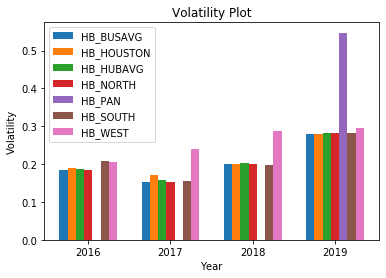

In [321]:
TYPE = 'HB'
tmp = df_vol.copy()

# make columns
tmp['type'] = [sp[0:2] for sp in tmp['SettlementPoint']]
tmp['Month'] = 1
tmp['day'] = 1
tmp['index'] = tmp['Year'].astype(str) + '-' + tmp['Month'].astype(str) + '-' + tmp['day'].astype(str)
tmp['index'] = pd.to_datetime(tmp['index'])

# only hub
tmp = tmp.loc[tmp['type'] == TYPE]

# remove unnecessary columns
tmp = tmp.drop(['Year', 'Month', 'day', 'type'], axis = 1)

# index
tmp = tmp.set_index(['index', 'SettlementPoint'])
tmp = tmp.unstack(level = 1)

# column name
tmp.columns = tmp.columns.get_level_values(1)

years = ['2016', '2017', '2018', '2019']

for i, col in enumerate(tmp.columns):

    plt.bar(np.arange(4) + i * 0.1 - 0.3, tmp[col], width = 0.1, label = col)

plt.xticks(np.arange(4), years)
plt.ylabel('Volatility')
plt.xlabel('Year')
plt.title('Volatility Plot')
plt.legend()
plt.savefig(SAVEFIG_03)
plt.show()

## Bonus - Hourly Shape Profile Computation

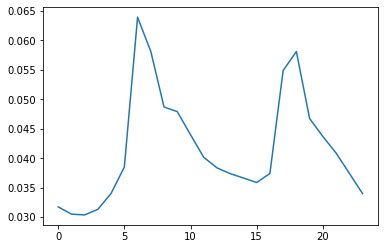

In [348]:
tmp = pd.read_csv(SUBDIR + 'spot_HB_BUSAVG.csv')
tmp['index'] = pd.to_datetime(tmp['Date'])
tmp = tmp.set_index('index')
tmp = tmp.loc[(tmp.index.month == 1) & 
              (tmp.index.dayofweek == 0)]

means = np.array(tmp.mean().tolist())

normalized = means / sum(means)

plt.plot(normalized)

In [371]:
tmp = pd.read_csv(SUBDIR + 'spot_HB_BUSAVG.csv')
tmp['index'] = pd.to_datetime(tmp['Date'])
tmp = tmp.set_index('index')
tmp = tmp.drop(['Variable', 'Date'], axis = 1)

tmp = tmp.groupby([tmp.index.month, tmp.index.dayofweek]).mean()

# normalize
tmp.loc[:, 'X1':'X24'] = tmp.loc[:, 'X1':'X24'].div(tmp.sum(axis = 1), axis = 0)

tmp = tmp.reset_index(level = 1)
tmp = tmp.rename(columns = {'index':'dayofweek'})
tmp = tmp.reset_index(level = 0)
tmp = tmp.rename(columns = {'index':'month'})

tmp.head()

,month,dayofweek,X1,X2,X3,X4,X5,X6,X7,X8,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24
0,1,0,0.031722,0.030484,0.030350,0.031295,0.034005,0.038473,0.063890,0.058083,...,0.036612,0.035847,0.037385,0.054839,0.058074,0.046716,0.043663,0.040849,0.037417,0.033969
1,1,1,0.026330,0.025004,0.025110,0.026489,0.030282,0.036408,0.065749,0.062837,...,0.035015,0.035243,0.037602,0.061643,0.068978,0.051856,0.045876,0.041800,0.036998,0.034059
2,1,2,0.023784,0.022953,0.023073,0.024100,0.028680,0.044134,0.144222,0.145185,...,0.027232,0.026830,0.027768,0.039331,0.042821,0.034966,0.032897,0.030301,0.027557,0.025062
3,1,3,0.030301,0.028867,0.029020,0.030185,0.033868,0.043744,0.082592,0.072493,...,0.034021,0.034015,0.035502,0.050692,0.053295,0.043173,0.040563,0.037334,0.035198,0.032703
4,1,4,0.033321,0.031160,0.031259,0.032204,0.035004,0.041056,0.066872,0.059066,...,0.035653,0.035114,0.036828,0.054310,0.055220,0.045534,0.042341,0.040695,0.036817,0.034697


In [373]:
variables = df_price['SettlementPoint'].unique().tolist()

for variable in variables:
    CSV_NAME = 'spot_' + variable + '.csv'
    tmp = pd.read_csv(SUBDIR + CSV_NAME)
    tmp['index'] = pd.to_datetime(tmp['Date'])
    tmp = tmp.set_index('index')
    tmp = tmp.drop(['Variable', 'Date'], axis = 1)

    tmp = tmp.groupby([tmp.index.month, tmp.index.dayofweek]).mean()

    # normalize
    tmp.loc[:, 'X1':'X24'] = tmp.loc[:, 'X1':'X24'].div(tmp.sum(axis = 1), axis = 0)
    
    # organize columns
    tmp = tmp.reset_index(level = 1)
    tmp = tmp.rename(columns = {'index':'dayofweek'})
    tmp = tmp.reset_index(level = 0)
    tmp = tmp.rename(columns = {'index':'month'})

    # make csv
    tmp.to_csv(SUBDIR_02 + 'profile_' + variable + '.csv', index = False)

## Bonus - Open-Ended Analysis

In [ ]:
df_price